In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('faltas_treinamento_limpo.xlsx')

display(df)

,Nome,Departamento,Turno,Faltas,Dia_da_Semana_Ultima_Falta,Data_Ultima_Falta,Evadiu,Faltas_Suspeitas
0,Colaborador_001,Operações,Manhã,2,Quarta,2024-01-18,Sim,False
1,Colaborador_002,Operações,Manhã,1,Segunda,2024-03-20,Não,False
2,Colaborador_003,Vendas,Manhã,3,Segunda,2024-03-10,Não,False
3,Colaborador_004,Marketing,Manhã,3,Segunda,2024-01-21,Não,False
4,Colaborador_005,RH,Manhã,1,Quarta,2024-02-18,Não,False
...,...,...,...,...,...,...,...,...
214,Colaborador_215,Operações,Tarde,3,Segunda,2024-02-09,Não,False
215,Colaborador_216,Operações,Manhã,1,Segunda,2024-03-28,Não,False
216,Colaborador_217,Financeiro,Tarde,2,Segunda,2024-01-24,Não,False
217,Colaborador_218,RH,Tarde,1,Terça,2024-02-07,Não,False


Exercício 4 – Análise Descritiva Avançada

In [12]:
# a) Qual o número total de evasões por departamento?

evasoes = df[df['Evadiu'] == 'Sim']
display(evasoes.groupby('Departamento').size())

Departamento
Financeiro    4
Marketing     6
Operações     4
RH            3
TI            1
Vendas        3
dtype: int64

In [13]:
# b) Qual é o percentual de evasão considerando apenas os que participaram do turno da tarde?

total_tarde = df[(df['Turno'] == 'Tarde')].shape[0]
evasoes_tarde = df[(df['Evadiu'] == 'Sim') & (df['Turno'] == 'Tarde')].shape[0]

porcentagem_evasoes_tarde = (evasoes_tarde * 100) / total_tarde

print(f'Porcentagem de evasões à tarde: {porcentagem_evasoes_tarde:.2f}%')

Porcentagem de evasões à tarde: 8.85%


In [14]:
# c) Qual é o desvio padrão de faltas por turno?

desvio_padrao_turno = df.groupby('Turno')['Faltas'].std()

display(desvio_padrao_turno)

print(df.groupby('Turno')['Faltas'].mean())

Turno
Manhã    1.376872
Tarde    1.430269
Name: Faltas, dtype: float64

Turno
Manhã    1.905660
Tarde    1.911504
Name: Faltas, dtype: float64


Exercício 5 – Análise Temporal

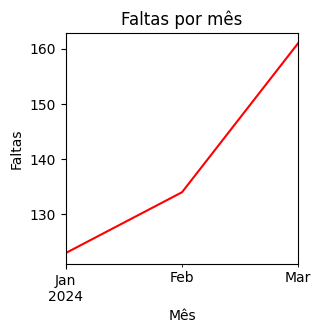

In [26]:
# a) Em qual mês ocorreu o maior número de faltas?

df_falta = df
df_falta['Mes_Falta'] = df_falta['Data_Ultima_Falta'].dt.to_period('M')
faltas_mes = df_falta.groupby('Mes_Falta')['Faltas'].sum()


faltas_mes.plot(kind='line', figsize=(3,3), color='red')
plt.title('Faltas por mês')
plt.xlabel('Mês')
plt.ylabel('Faltas')
plt.show()

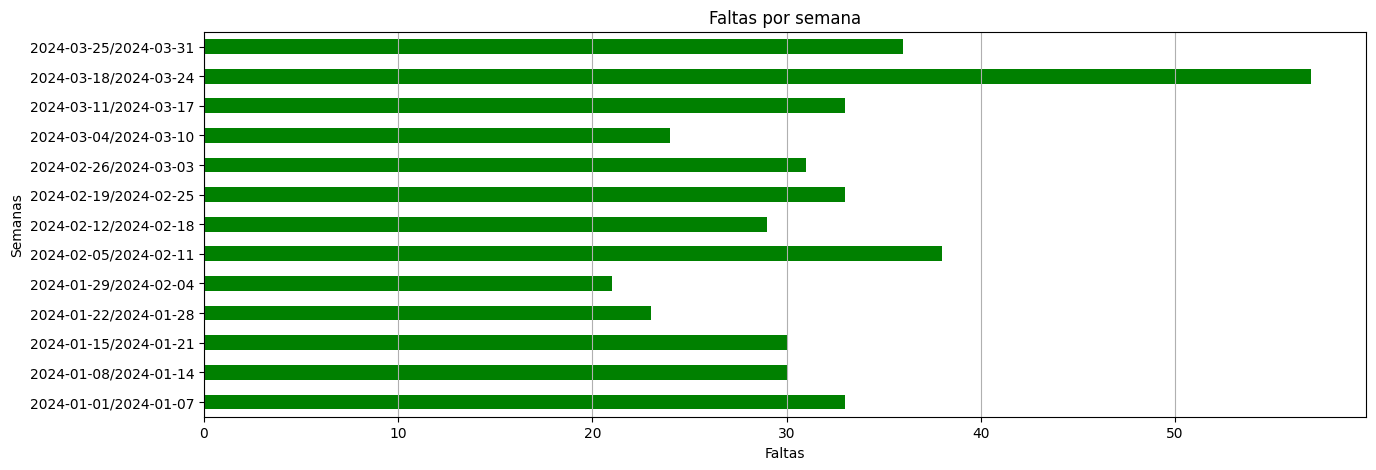

In [37]:
# b) Crie uma coluna Semana_Ultima_Falta e descubra qual semana teve maior concentração de ausências

df_falta['Semana_Ultima_Falta'] = df_falta['Data_Ultima_Falta'].dt.to_period('W')

faltas_por_semana = df_falta.groupby('Semana_Ultima_Falta')['Faltas'].sum()

faltas_por_semana.plot(kind='barh', figsize=(15,5), color='green')
plt.grid(axis='x')
plt.title('Faltas por semana')
plt.xlabel('Faltas')
plt.ylabel('Semanas')
plt.show()

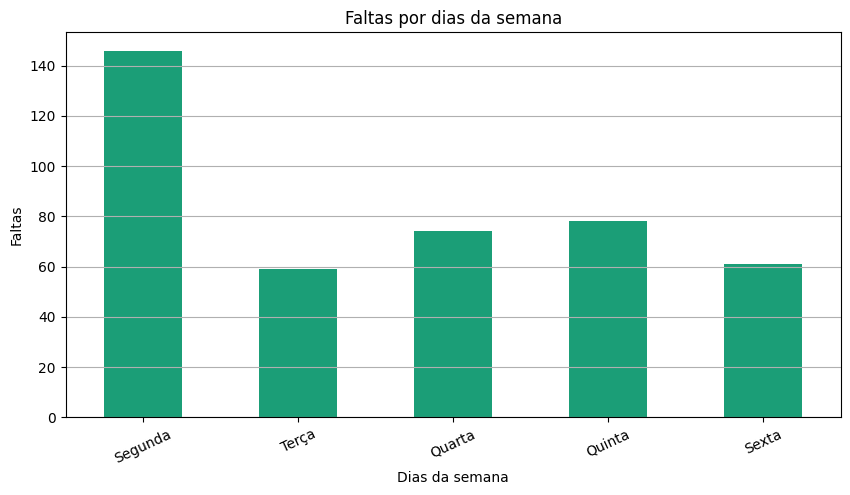

In [44]:
# c) Faça uma análise cruzando dia da semana e quantidade de evasões.

relacao_dia_da_semana_e_quantidade_evasoes = df_falta.groupby('Dia_da_Semana_Ultima_Falta')['Faltas'].sum()

ordem_dias_uteis = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta']
relacao_dia_da_semana_e_quantidade_evasoes = relacao_dia_da_semana_e_quantidade_evasoes.reindex(ordem_dias_uteis)


relacao_dia_da_semana_e_quantidade_evasoes.plot(kind='bar', figsize=(10,5), colormap='Dark2')
plt.grid(axis='y')
plt.title('Faltas por dias da semana')
plt.xlabel('Dias da semana')
plt.ylabel('Faltas')
plt.xticks(rotation=25)
plt.show()

Exercício 6 – Análise de Risco

In [47]:
# a) Crie a coluna Risco_Evasao com três categorias: &quot;Alto&quot;, &quot;Moderado&quot;, &quot;Baixo&quot;.

df['Risco_Evasao'] = pd.cut(df['Faltas'], bins=[-1,2,5,16], labels=['Baixo', 'Moderado', 'Alto'])

df

,Nome,Departamento,Turno,Faltas,Dia_da_Semana_Ultima_Falta,Data_Ultima_Falta,Evadiu,Faltas_Suspeitas,Mes_Falta,Semana_Ultima_Falta,Risco_Evasao
0,Colaborador_001,Operações,Manhã,2,Quarta,2024-01-18,Sim,False,2024-01,2024-01-15/2024-01-21,Baixo
1,Colaborador_002,Operações,Manhã,1,Segunda,2024-03-20,Não,False,2024-03,2024-03-18/2024-03-24,Baixo
2,Colaborador_003,Vendas,Manhã,3,Segunda,2024-03-10,Não,False,2024-03,2024-03-04/2024-03-10,Moderado
3,Colaborador_004,Marketing,Manhã,3,Segunda,2024-01-21,Não,False,2024-01,2024-01-15/2024-01-21,Moderado
4,Colaborador_005,RH,Manhã,1,Quarta,2024-02-18,Não,False,2024-02,2024-02-12/2024-02-18,Baixo
...,...,...,...,...,...,...,...,...,...,...,...
214,Colaborador_215,Operações,Tarde,3,Segunda,2024-02-09,Não,False,2024-02,2024-02-05/2024-02-11,Moderado
215,Colaborador_216,Operações,Manhã,1,Segunda,2024-03-28,Não,False,2024-03,2024-03-25/2024-03-31,Baixo
216,Colaborador_217,Financeiro,Tarde,2,Segunda,2024-01-24,Não,False,2024-01,2024-01-22/2024-01-28,Baixo
217,Colaborador_218,RH,Tarde,1,Terça,2024-02-07,Não,False,2024-02,2024-02-05/2024-02-11,Baixo


In [48]:
# b) Gere uma tabela com a distribuição percentual de risco por departamento.

distribuicao = df.groupby(['Departamento', 'Risco_Evasao']).size().unstack()
display(distribuicao)

C:\Users\46492449860\AppData\Local\Temp\ipykernel_21820\3115387153.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby(['Departamento', 'Risco_Evasao']).size().unstack()


Risco_Evasao,Baixo,Moderado,Alto
Departamento,,,
Financeiro,26,9,0
Marketing,30,11,0
Operações,39,13,0
RH,21,10,0
TI,20,10,0
Vendas,20,9,1


In [49]:
# c) Há relação entre risco alto e turno da tarde?

distribuicao = df.groupby(['Turno', 'Risco_Evasao']).size().unstack()

display(distribuicao)

C:\Users\46492449860\AppData\Local\Temp\ipykernel_21820\848739090.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby(['Turno', 'Risco_Evasao']).size().unstack()


Risco_Evasao,Baixo,Moderado,Alto
Turno,,,
Manhã,76,29,1
Tarde,80,33,0


Exercício 7 – Visualizações Estratégicas

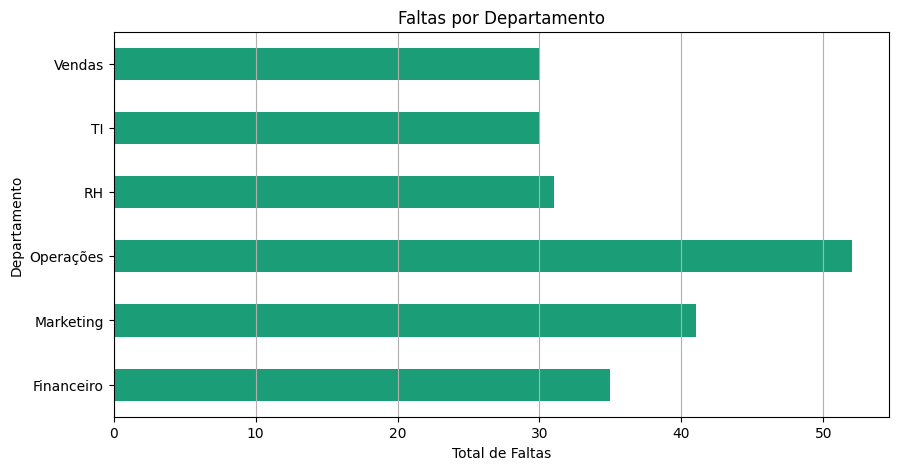

In [60]:
# a) Gráfico de barras: número de faltas por departamento.

faltas_departamento = df.groupby('Departamento')['Faltas'].size()

faltas_departamento.plot(kind='barh', figsize=(10,5), colormap='Dark2')
plt.grid(axis='x')

plt.title('Faltas por Departamento')
plt.xlabel('Total de Faltas')
plt.show()

C:\Users\46492449860\AppData\Local\Temp\ipykernel_21820\998777362.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao_geral_risco = df.groupby('Risco_Evasao').size()


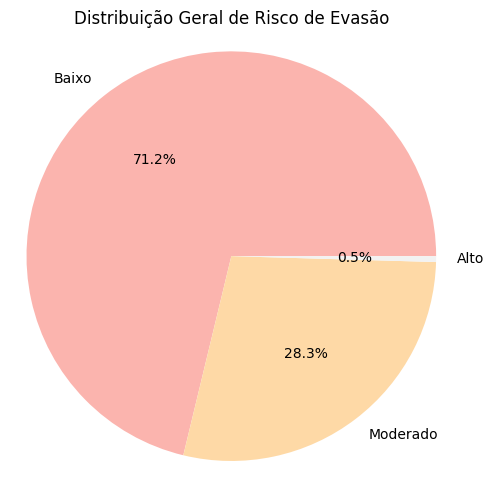

In [66]:
# b) Gráfico de pizza: distribuição de risco de evasão.

distribuicao_geral_risco = df.groupby('Risco_Evasao').size()

distribuicao_geral_risco.plot(kind='pie', figsize=(5,5), colormap='Pastel1', subplots=True, autopct='%1.1f%%')
plt.title('Distribuição Geral de Risco de Evasão')
plt.axis('equal')
plt.tight_layout()
plt.show()


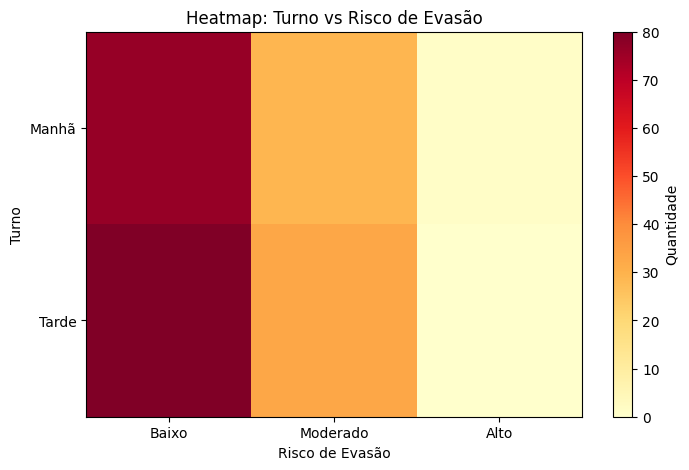

In [63]:
# c) Heatmap cruzando Turno e Risco_Evasao.

plt.figure(figsize=(8, 5))

plt.imshow(distribuicao, cmap='YlOrRd', aspect='auto')

plt.xticks(ticks=range(distribuicao.shape[1]), labels=distribuicao.columns)
plt.yticks(ticks=range(distribuicao.shape[0]), labels=distribuicao.index)

plt.colorbar(label='Quantidade')
plt.title('Heatmap: Turno vs Risco de Evasão')
plt.xlabel('Risco de Evasão')
plt.ylabel('Turno')
plt.show()